# *House Price Prediction - Properatti*

###  _Authors:_ 

- Pedro Terrado
- Segundo Rodriguez Parodi
- Pedro Roisman
- Thomas Gomez

#### [1 - Selecting Features](#section_features)
#### [2 - OneHot Encoding](#section_onehot)
#### [3 - Multiple Linear Regression](#section_multiple)
#### [4 - Lasso Regression](#section_lasso)
#### [5 - Ridge Regression](#section_ridge)
#### [6 - Random Forest Regressor](#section_rf)

---

# [1 - Selecting Features](#section_features)

#### $\hspace{.5cm}$[1.1 - Import libraries and load the dataset](#seccion_import)

#### $\hspace{.5cm}$[1.2 - Confussion Matrix](#seccion_confmatrix)

#### $\hspace{.5cm}$[1.3 - Multicollinearity and VIF](#seccion_vif)

## [1.1 - Import libraries and load the dataset](#seccion_import)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/thomas/ThomasFold/Proyectos_DS/HousePricePrediction/data_prop.csv')

In [3]:
data.head(3)

,Unnamed: 0,property_type,price_aprox_usd,rooms,description,title,state,town,extra_info,surface_covered_m2,surface_total_m2,price_usd_m2,repair,pool,amenities,garage,financing
0,0,PH,62000.0,2,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,NaN,40.0,55.0,1127.272727,1,0,0,0,1
1,2,apartment,72000.0,2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,NaN,55.0,55.0,1309.090909,0,0,0,0,0
2,4,apartment,64000.0,2,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|,35.0,35.0,1828.571429,0,0,0,0,0


## [1.2 - Confussion Matrix](#seccion_import)

<AxesSubplot:>

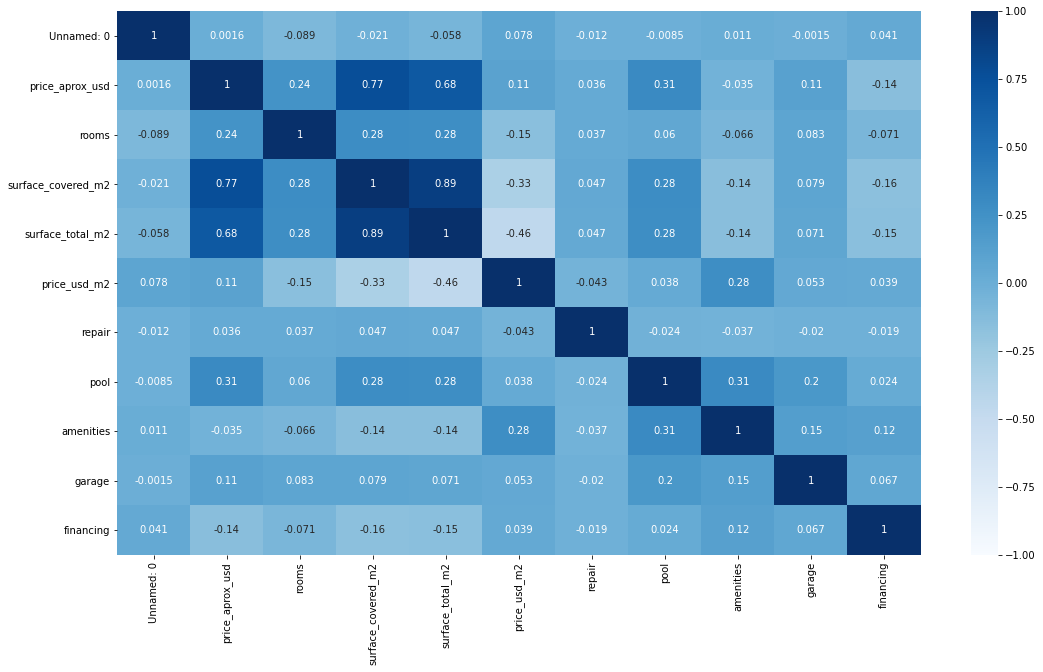

In [4]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')

## [1.3 - Multicollinearity and VIF](#seccion_import)

In [5]:
features = ['price_usd_m2', 'rooms', 'surface_covered_m2', 'surface_total_m2', 'repair', 'pool', 'amenities', 'garage','financing']

In [6]:
# We're going to use VIF (variance inflation factor) to measure multicolinearity.
# If VIF is near to 10, probably we could have multicolinearity, so we could consider to drop the feature 
# If VIF > 30 we're going to drop the feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(data[features].values, i) for i in range(data[features].shape[1])]
vif = pd.DataFrame({'vif':vif}, index=features)
vif.sort_values(by='vif', ascending=False)

,vif
surface_covered_m2,10.460008
surface_total_m2,9.563986
rooms,2.988469
price_usd_m2,2.819652
garage,1.869687
pool,1.802826
amenities,1.366624
financing,1.191941
repair,1.022039


In [7]:
categorical_columns = ['property_type', 'state', 'town']
numerical_columns = [x for x in data.columns if data[x].dtypes != 'object']

numerical_columns.remove('price_usd_m2')
numerical_features = data[numerical_columns]

# [2 - OneHot Encoding](#section_onehot)

#### $\hspace{.5cm}$[1.1 - Creating dummy variables](#seccion_dummy)

## [1.1 - Creating dummy variables](#seccion_import)

In [8]:
# Let's create dummy variables for categorical features wich are going to help us to train the model

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first')

dummy_onehot = onehot_encoder.fit_transform(data[categorical_columns])

df_onehot = pd.DataFrame(dummy_onehot.toarray())
df_onehot.head(5)

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
categorical_column_names = [categorical_columns[i] + '_' + onehot_encoder.categories_[i] for i in range(len(categorical_columns))]
                            
categorical_column_names_drop_first = [sublist[i] for sublist in categorical_column_names for i in range(len(sublist)) if i != 0]

df_onehot.columns = categorical_column_names_drop_first
df_onehot

,property_type_apartment,property_type_house,property_type_store,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Buenos Aires Costa Atlántica,state_Buenos Aires Interior,state_Capital Federal,state_Catamarca,state_Corrientes,...,town_Villa Crespo,town_Villa Devoto,town_Villa General Belgrano,town_Villa Gesell,town_Villa Lugano,town_Villa Luro,town_Villa Pueyrredón,town_Villa Urquiza,town_Villa del Parque,town_Yerba Buena
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74973,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# [3 - Multiple Linear Regression](#section_features)

#### $\hspace{.5cm}$[1.1 - X - Y matrix and train_test_split](#seccion_import)

#### $\hspace{.5cm}$[1.2 - Build, train, and predict](#seccion_confmatrix)

#### $\hspace{.5cm}$[1.3 - Analyzing metrics](#seccion_vif)

## [1.1 - X - Y matrix and train_test_split](#seccion_import)

In [10]:
# Creating X and Y matrix

X = pd.concat([df_onehot, numerical_features], axis=1)
Y = data['price_usd_m2']

In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)

## [1.2 - Build, train, and predict](#seccion_import)

In [12]:
# Build, train and predict

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X_train, Y_train)


lr_predict_train = linear_regression.predict(X_train)
lr_predict_test = linear_regression.predict(X_test)

## [1.3 - Analyzing metrics](#seccion_import)

In [13]:
# Let's see some metrics in testing 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_train, lr_predict_train))
print('MSE:', metrics.mean_squared_error(Y_train, lr_predict_train))
print('R2:', metrics.r2_score(Y_train, lr_predict_train))

MAE: 309.41140263042524
MSE: 177739.034552162
R2: 0.7404657020266886


(0.0, 5000.0)

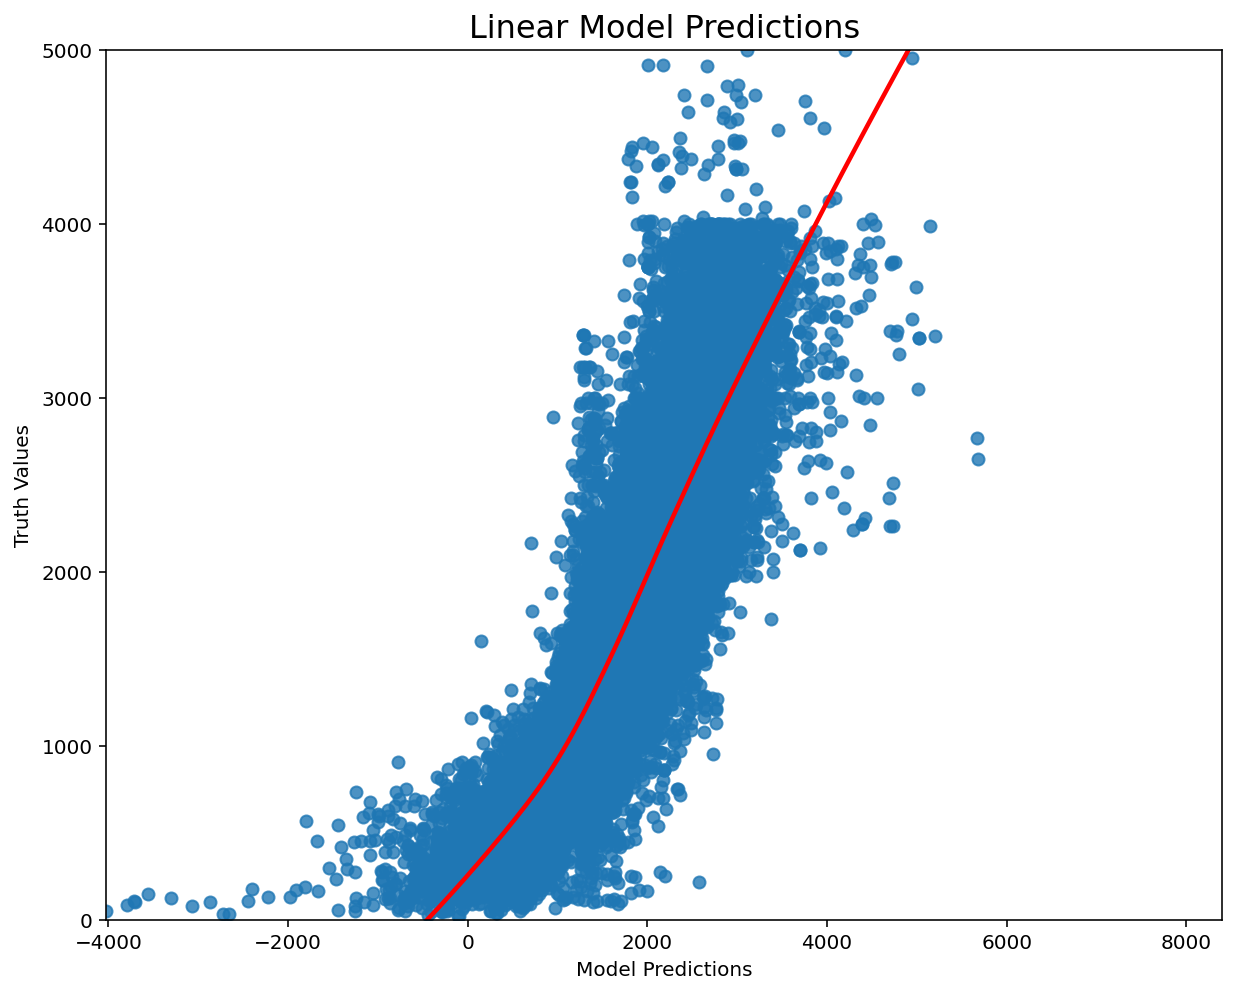

In [14]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

plt.subplots(figsize=(10,8))
plt.title('Linear Model Predictions', fontsize=16)
sns.set_style('darkgrid')

sns.regplot(x=lr_predict_train, y=Y_train, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Model Predictions")
plt.ylabel("Truth Values")
plt.ylim([0,5000])


# [4 - Lasso Regression](#section_features)

#### $\hspace{.5cm}$[1.1 - Building a model with Lasso penalization](#seccion_confmatrix)

#### $\hspace{.5cm}$[1.2 - Analyzing metrics](#seccion_vif)

## [1.1 - Building a model with Lasso penalization](#seccion_import)

In [15]:
# Let's apply penalizations to the regression model 

from sklearn import linear_model

lasso_cv = linear_model.LassoCV(alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 4.0, 6.0, 10.0], normalize=True, cv=10)

cross_val_lasso = lasso_cv.fit(X_train, Y_train)

best_alpha_lasso = cross_val_lasso.alpha_
print(best_alpha_lasso)

0.001


In [16]:
lasso_model = linear_model.Lasso(alpha=best_alpha_lasso)

lasso_fit = lasso_model.fit(X_train, Y_train)

lasso_predict_train = lasso_model.predict(X_train)
lasso_predict_test = lasso_model.predict(X_test)

/home/thomas/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3980218782.6034145, tolerance: 3080813.700078202
  model = cd_fast.enet_coordinate_descent(


## [1.2 - Analyzing metrics](#seccion_import)

In [17]:
# Let's see some metrics in train

print('MAE:', metrics.mean_absolute_error(Y_train, lasso_predict_train))
print('MSE:', metrics.mean_squared_error(Y_train, lasso_predict_train))
print('R2:', metrics.r2_score(Y_train, lasso_predict_train))

MAE: 309.36128725616675
MSE: 177706.76069312083
R2: 0.7405128282720306


In [18]:
# Let's see some metrics in test

print('MAE:', metrics.mean_absolute_error(Y_test, lasso_predict_test))
print('MSE:', metrics.mean_squared_error(Y_test, lasso_predict_test))
print('R2:', metrics.r2_score(Y_test, lasso_predict_test))

MAE: 309.78511193706254
MSE: 179114.5379934258
R2: 0.7350300791289377


# [5 - Ridge Regression](#section_features)

#### $\hspace{.5cm}$[1.1 - Building a model with Ridge penalization](#seccion_confmatrix)

#### $\hspace{.5cm}$[1.2 - Analyzing metrics](#seccion_vif)

## [1.1 - Building a model with Ridge penalization](#seccion_import)

In [19]:
ridge_cv = linear_model.RidgeCV(alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 4.0, 6.0, 10.0], normalize=True, cv=10)

cross_val_ridge = ridge_cv.fit(X_train, Y_train)

best_alpha_ridge = cross_val_ridge.best_score_

print(best_alpha_ridge)

0.7387394784310255


In [20]:
ridge_model = linear_model.Ridge(alpha=best_alpha_ridge)

ridge_fit = ridge_model.fit(X_train, Y_train)

ridge_predict_train = ridge_model.predict(X_train)
ridge_predict_test = ridge_model.predict(X_test)

## [1.2 - Analyzing metrics](#seccion_import)

In [21]:
# Let's see some metrics 

print('MAE:', metrics.mean_absolute_error(Y_train, ridge_predict_train))
print('MSE:', metrics.mean_squared_error(Y_train, ridge_predict_train))
print('R2:', metrics.r2_score(Y_train, ridge_predict_train))

MAE: 309.3678368361803
MSE: 177713.67191830097
R2: 0.7405027365103656


In [22]:
# Let's see some metrics in test

print('MAE:', metrics.mean_absolute_error(Y_test, ridge_predict_test))
print('MSE:', metrics.mean_squared_error(Y_test, ridge_predict_test))
print('R2:', metrics.r2_score(Y_test, ridge_predict_test))

MAE: 309.7891107050157
MSE: 179121.75338812772
R2: 0.7350194051625214


(0.0, 5000.0)

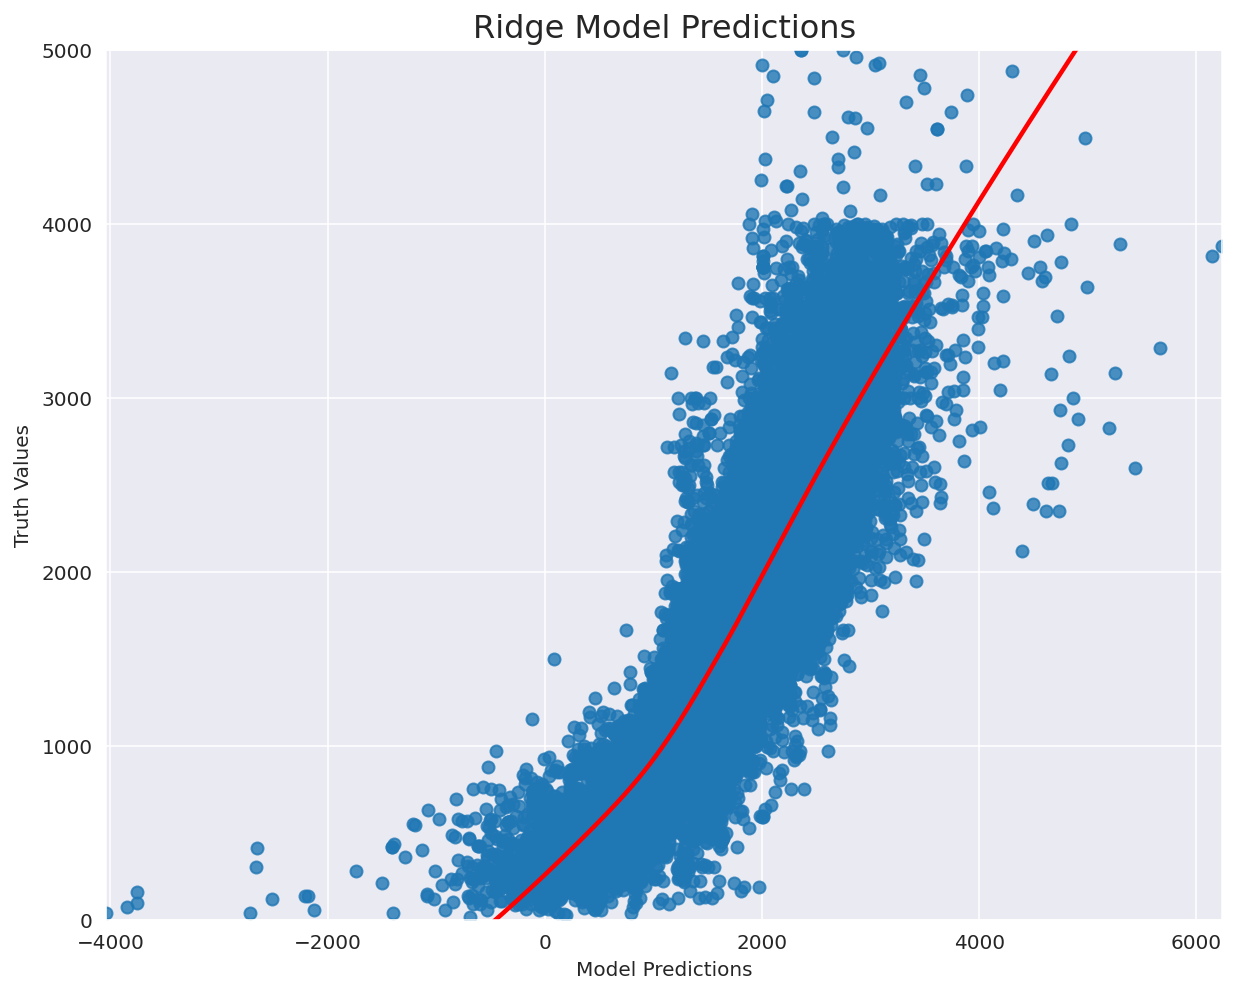

In [23]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

plt.subplots(figsize=(10,8))
plt.title('Ridge Model Predictions', fontsize=16)
sns.set_style('darkgrid')

sns.regplot(x=ridge_predict_test, y=Y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Model Predictions")
plt.ylabel("Truth Values")
plt.ylim([0,5000])

# [6 - Random Forest Regressor](#section_features)

#### $\hspace{.5cm}$[1.1 - Import libraries for Random Forest and GridSearchCV](#seccion_import)

#### $\hspace{.5cm}$[1.2 - Building a Random Forest Regressor](#seccion_confmatrix)

#### $\hspace{.5cm}$[1.3 - Analyzing metrics](#seccion_vif)

## [1.1 - Import libraries for Random Forest and GridSearchCV](#seccion_import)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## [1.2 - Building a Random Forest Regressor](#seccion_import)

In [25]:
rf_regressor = RandomForestRegressor(max_depth=100, random_state=42)

In [26]:
param_grid = { 'n_estimators': [10, 50, 100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 2, 4, 6, 8, 10]}

In [27]:
random_forest_grid = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=4)

In [28]:
random_forest_grid.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=100, random_state=42),
             n_jobs=4,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100]})

In [29]:
rfgrid_predict_train = random_forest_grid.predict(X_train)
rfgrid_predict_test = random_forest_grid.predict(X_test)

## [1.3 - Analyzing metrics](#seccion_import)

In [30]:
print('MAE:', metrics.mean_absolute_error(Y_train, rfgrid_predict_train))
print('MSE:', metrics.mean_squared_error(Y_train, rfgrid_predict_train))
print('R2:', metrics.r2_score(Y_train, rfgrid_predict_train))

MAE: 32.70843188545836
MSE: 4989.583217032176
R2: 0.9927142173317487


In [31]:
print('MAE:', metrics.mean_absolute_error(Y_test, rfgrid_predict_test))
print('MSE:', metrics.mean_squared_error(Y_test, rfgrid_predict_test))
print('R2:', metrics.r2_score(Y_test, rfgrid_predict_test))

MAE: 35.96132645954617
MSE: 6380.219324811423
R2: 0.9905615354924604


(0.0, 5000.0)

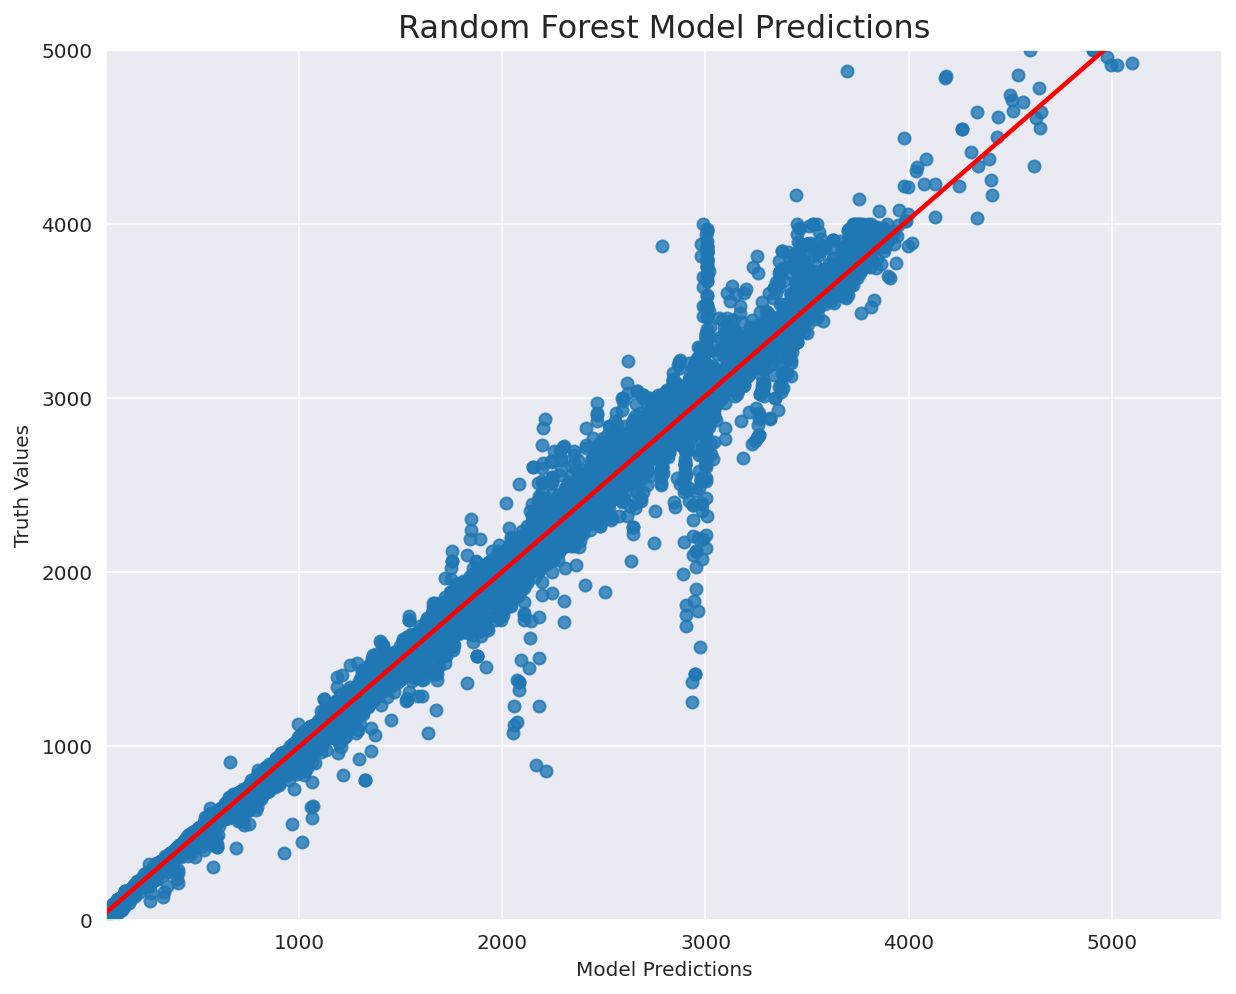

In [32]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

plt.subplots(figsize=(10,8))
plt.title('Random Forest Model Predictions', fontsize=16)
sns.set_style('darkgrid')

sns.regplot(x=rfgrid_predict_test, y=Y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Model Predictions")
plt.ylabel("Truth Values")
plt.ylim([0,5000])